<a href="https://colab.research.google.com/github/nemodesouza/TCC-AIX/blob/main/validade_convergente_discriminante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# UNIVERSIDADE FEDERAL DE SANTA CATARINA
# CENTRO TECNOLÓGICO
# DEPARTAMENTO DE INFORMÁTICA E ESTATÍSTICA
# GRADUAÇÃO EM SISTEMAS DE INFORMAÇÃO
# TRABALHO DE CONCLUSÃO DE CURSO
# NEMO DE SOUZA

# PA3 = Análise de Validade Convergente e Discriminante do Checklist AIX
# Script para a análise de validade do checklist de heurísticas de AIX

# Carregamento de bibliotecas
if (!require(psych)) install.packages("psych")        # Para análise fatorial
if (!require(polycor)) install.packages("polycor")    # Para correlação policórica
if (!require(corrplot)) install.packages("corrplot")  # Para visualização de correlações

library(psych)
library(polycor)
library(corrplot)

Loading required package: psych

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘psych’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’


Loading required package: polycor

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘polycor’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mvtnorm’, ‘admisc’


Loading required package: corrplot

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘corrplot’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘polycor’


The following object is masked from ‘package:psych’:

    polyserial


corrp

In [2]:
# Carregamento dos dados
dados <- "PA2 a PA4 - matrix_avaliacao_aplicativos.csv"
heuristicas <- "matriz_heuristicas_e_itens_checklist.csv"

dados <- read.csv(dados, stringsAsFactors = FALSE)
heuristicas <- read.csv(heuristicas, stringsAsFactors = FALSE)

# Verificação da estrutura dos dados
str(dados)
head(dados)

# Verificar a estrutura das heurísticas
str(heuristicas)
head(heuristicas)

'data.frame':	127 obs. of  25 variables:
 $ N.         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Nome.do.App: chr  "AI Dermatologist: Skin Scanner" "ArchAIDE" "Bird ID - Picture Identifier" "Bird Identification Apps" ...
 $ c1         : chr  "Sim" "Sim" "Sim" "Sim" ...
 $ c2         : chr  "Não" "Não" "Não" "Não" ...
 $ c3         : chr  "Sim" "Sim" "Sim" "Sim" ...
 $ c4         : chr  "Sim" "Não" "Não" "Não" ...
 $ c5         : chr  "Sim" "Sim" "Sim" "Sim" ...
 $ c6         : chr  "Sim" "Não" "Sim" "Sim" ...
 $ c7         : chr  "Não" "Não" "Sim" "Não" ...
 $ c8         : chr  "Sim" NA NA NA ...
 $ c9         : chr  NA NA NA NA ...
 $ c10        : chr  "Sim" "Não" "Não" "Não" ...
 $ c11        : chr  "Sim" "Sim" "Não" "Não" ...
 $ c12        : chr  "Não" "Não" "Não" "Não" ...
 $ c13        : chr  "Não" "Não" "Não" "Não" ...
 $ c14        : chr  "Não" "Não" "Sim" "Não" ...
 $ c15        : chr  "Não" "Não" "Sim" "Não" ...
 $ c16        : chr  "Não" NA NA NA ...
 $ c17        : chr  NA NA NA NA

,N.,Nome.do.App,c1,c2,c3,c4,c5,c6,c7,c8,⋯,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,AI Dermatologist: Skin Scanner,Sim,Não,Sim,Sim,Sim,Sim,Não,Sim,⋯,Não,Não,Não,NA,Sim,NA,Sim,NA,Não,Sim
2,2,ArchAIDE,Sim,Não,Sim,Não,Sim,Não,Não,NA,⋯,Não,Não,NA,NA,Sim,NA,Sim,NA,NA,NA
3,3,Bird ID - Picture Identifier,Sim,Não,Sim,Não,Sim,Sim,Sim,NA,⋯,Sim,Sim,NA,NA,Sim,NA,Sim,NA,NA,NA
4,4,Bird Identification Apps,Sim,Não,Sim,Não,Sim,Sim,Não,NA,⋯,Não,Não,NA,NA,Sim,NA,Sim,NA,NA,NA
5,5,CamFind,Sim,Não,Sim,Não,Sim,Não,NA,NA,⋯,NA,Não,NA,Não,NA,NA,Sim,NA,NA,NA
6,6,Cash Reader: Bill Identifier,Sim,Não,Sim,Não,Não,Não,NA,NA,⋯,Não,Não,NA,NA,Sim,NA,Sim,NA,NA,NA


'data.frame':	23 obs. of  6 variables:
 $ ID.Heurística     : chr  "h1" "h1" "h1" "h2" ...
 $ Heurística        : chr  "Deixar as expectativas e limitações explícitas" "Deixar as expectativas e limitações explícitas" "Deixar as expectativas e limitações explícitas" "Apoiar o uso efetivo" ...
 $ ID.checklist      : chr  "c1" "c2" "c3" "c4" ...
 $ Item.de.checklist : chr  "1. O app deixa claro quais classes ele pode classificar?" "2. O aplicativo deixa claro o quão bem ele pode fazer a classificação de imagens?" "3. O aplicativo fornece explicações compreensíveis?" "4. O app mostra dicas de como tirar fotos com qualidade adequada?" ...
 $ Explicação.do.item: chr  "O app apresenta as classes que é capaz de distinguir antes do usuário poder classificar uma imagem. (p.ex. na tela home)." "O app apresenta ao usuário o grau do seu desempenho (p.ex. acurácia) antes do usuário poder classificar uma ima"| __truncated__ "O app utiliza apenas uma terminologia compreensível pelo público alvo, evita

,ID.Heurística,Heurística,ID.checklist,Item.de.checklist,Explicação.do.item,Escala.de.resposta
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,h1,Deixar as expectativas e limitações explícitas,c1,1. O app deixa claro quais classes ele pode classificar?,O app apresenta as classes que é capaz de distinguir antes do usuário poder classificar uma imagem. (p.ex. na tela home).,"Sim, Não"
2,h1,Deixar as expectativas e limitações explícitas,c2,2. O aplicativo deixa claro o quão bem ele pode fazer a classificação de imagens?,O app apresenta ao usuário o grau do seu desempenho (p.ex. acurácia) antes do usuário poder classificar uma imagem. p.ex. na tela home).,"Sim, Não"
3,h1,Deixar as expectativas e limitações explícitas,c3,3. O aplicativo fornece explicações compreensíveis?,"O app utiliza apenas uma terminologia compreensível pelo público alvo, evitando jargão técnico, ao apresentar as expectativas e limitações.","Sim, Não"
4,h2,Apoiar o uso efetivo,c4,4. O app mostra dicas de como tirar fotos com qualidade adequada?,O app apresenta instruções/dicas para guiar o usuário a tirar fotos com qualidade adequada para a classificação.,"Sim, Não"
5,h2,Apoiar o uso efetivo,c5,5. O app visualiza o status durante o processamento da classificação?,O app apresenta elementos para visualizar o status do progresso durante o processamento da classificação.,"Sim, Não"
6,h3,Apoiar a compreensão do usuário sobre incerteza e a confiança do modelo,c6,6. O app deixa claro que existe incerteza em relação ao resultado da classificação?,O resultado da classificação é apresentado indicando que existe uma incerteza em relação a este resultado.,"Sim, Não"


In [3]:
#### Preparação dos dados para análise

# Seleção das colunas dos itens (c1 a c23)
itens <- dados[, grep("^c\\d+$", names(dados))]

# Conversão das respostas para valores numéricos (Sim = 1, Não = 0, NA = NA)
itens_num <- as.data.frame(lapply(itens, function(x) {
  ifelse(x == "Sim", 1, ifelse(x == "Não", 0, NA))
}))

# Verificação da conversão
head(itens_num)

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,⋯,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,1,1,1,1,0,1,NA,1,⋯,0,0,0,NA,1,NA,1,NA,0,1
2,1,0,1,0,1,0,0,NA,NA,0,⋯,0,0,NA,NA,1,NA,1,NA,NA,NA
3,1,0,1,0,1,1,1,NA,NA,0,⋯,1,1,NA,NA,1,NA,1,NA,NA,NA
4,1,0,1,0,1,1,0,NA,NA,0,⋯,0,0,NA,NA,1,NA,1,NA,NA,NA
5,1,0,1,0,1,0,NA,NA,0,0,⋯,NA,0,NA,0,NA,NA,1,NA,NA,NA
6,1,0,1,0,0,0,NA,NA,NA,0,⋯,0,0,NA,NA,1,NA,1,NA,NA,NA


In [4]:
#### Criação do dicionário para mapear códigos de itens para descrições de heurísticas

# Estrutura arquivo:
# - ID Heurística: h1, h2, etc.
# - Heurística: Descrição da heurística
# - ID checklist: c1, c2, etc.
# - Item de checklist: Descrição do checklist

id_heuristicas <- heuristicas$ID.Heurística
descricoes_heuristicas <- heuristicas$Heurística
codigos_itens <- heuristicas$ID.checklist
descricoes_itens <- heuristicas$Item.de.checklist

# Criação dataframe de mapeamento
dicionario <- data.frame(
  codigo_item = codigos_itens,
  descricao_item = descricoes_itens,
  id_heuristica = id_heuristicas,
  descricao_heuristica = descricoes_heuristicas,
  stringsAsFactors = FALSE
)

# Verificação o dicionário criado
head(dicionario)

,codigo_item,descricao_item,id_heuristica,descricao_heuristica
,<chr>,<chr>,<chr>,<chr>
1,c1,1. O app deixa claro quais classes ele pode classificar?,h1,Deixar as expectativas e limitações explícitas
2,c2,2. O aplicativo deixa claro o quão bem ele pode fazer a classificação de imagens?,h1,Deixar as expectativas e limitações explícitas
3,c3,3. O aplicativo fornece explicações compreensíveis?,h1,Deixar as expectativas e limitações explícitas
4,c4,4. O app mostra dicas de como tirar fotos com qualidade adequada?,h2,Apoiar o uso efetivo
5,c5,5. O app visualiza o status durante o processamento da classificação?,h2,Apoiar o uso efetivo
6,c6,6. O app deixa claro que existe incerteza em relação ao resultado da classificação?,h3,Apoiar a compreensão do usuário sobre incerteza e a confiança do modelo


In [7]:
#### Identificação e remoção de colunas problemáticas

# Cálculo da porcentagem de NAs em cada coluna
na_percentagem <- colMeans(is.na(itens_num)) * 100
print("Porcentagem de NAs em cada coluna:")
print(na_percentagem)

# Cálculo do desvio padrão de cada coluna
desvios <- sapply(itens_num, sd, na.rm = TRUE)
print("Desvio padrão de cada coluna:")
print(desvios)

# Colunas com desvio padrão zero ou muito baixo
colunas_desvio_zero <- names(desvios[desvios < 0.1])
print("Colunas com desvio padrão próximo de zero:")
print(colunas_desvio_zero)

# Colunas com muitos NAs (mais de 30%)
colunas_muitos_na <- names(na_percentagem[na_percentagem > 30])
print("Colunas com mais de 30% de NAs:")
print(colunas_muitos_na)

# Colunas a serem removidas (desvio zero ou muitos NAs)
colunas_remover <- unique(c(colunas_desvio_zero, colunas_muitos_na))
print("Colunas a serem removidas:")
print(colunas_remover)

# Conjunto de dados limpo
itens_limpos <- itens_num[, !(names(itens_num) %in% colunas_remover)]

# Verificação das dimensões do conjunto de dados após limpeza
print("Dimensões do conjunto de dados após limpeza:")
print(dim(itens_limpos))

# Dataframe com informações detalhadas sobre os itens removidos
itens_removidos <- data.frame(
  codigo = colunas_remover,
  proporcao_na = na_percentagem[colunas_remover],
  id_heuristica = sapply(colunas_remover, function(codigo) {
    idx <- which(dicionario$codigo_item == codigo)
    if (length(idx) > 0) dicionario$id_heuristica[idx[1]] else NA
  }),
  descricao_heuristica = sapply(colunas_remover, function(codigo) {
    idx <- which(dicionario$codigo_item == codigo)
    if (length(idx) > 0) dicionario$descricao_heuristica[idx[1]] else NA
  }),
  motivo = sapply(colunas_remover, function(codigo) {
    if (codigo %in% colunas_desvio_zero) {
      if (codigo %in% colunas_muitos_na) {
        return("Desvio padrão próximo de zero e muitos NAs")
      } else {
        return("Desvio padrão próximo de zero")
      }
    } else {
      return("Muitos valores NA")
    }
  })
)

# Ordenação por proporção de NA
itens_removidos <- itens_removidos[order(-itens_removidos$proporcao_na), ]

# Informações detalhadas sobre os itens removidos
print("Detalhes dos itens removidos:")
print(itens_removidos)


[1] "Porcentagem de NAs em cada coluna:"
      c1       c2       c3       c4       c5       c6       c7       c8 
 0.00000  0.00000  0.00000  0.00000  0.00000  0.00000 41.73228 76.37795 
      c9      c10      c11      c12      c13      c14      c15      c16 
83.46457  0.00000  0.00000  0.00000  0.00000 11.81102  0.00000 61.41732 
     c17      c18      c19      c20      c21      c22      c23 
80.31496 14.17323 69.29134  0.00000 74.80315 66.14173 69.29134 
[1] "Desvio padrão de cada coluna:"
       c1        c2        c3        c4        c5        c6        c7        c8 
0.4993434 0.3240168 0.3866281 0.4936796 0.4264414 0.5000937 0.5017555 0.4301831 
       c9       c10       c11       c12       c13       c14       c15       c16 
0.4830459 0.2823828 0.4631125 0.5012171 0.4264414 0.4240972 0.4445226 0.2422261 
      c17       c18       c19       c20       c21       c22       c23 
0.4358899 0.4866551 0.3655178 0.3144243 0.4399413 0.4538503 0.2699528 
[1] "Colunas com desvio padrão próxim

In [18]:
#### Análise de Validade Convergente e Discriminante

# Verificação da distribuição das respostas
summary(itens_limpos)
apply(itens_limpos, 2, table)

# Verificar tamanho da amostra
nrow(itens_limpos)
ncol(itens_limpos)

# Regra geral: pelo menos 5-10 casos por variável
cat("Razão casos/variáveis:", nrow(itens_limpos)/ncol(itens_limpos))

# Identificar variáveis com pouca variação
variancia <- apply(itens_limpos, 2, var, na.rm = TRUE)
variaveis_problematicas <- names(variancia[variancia < 0.1])
print(variaveis_problematicas)

# Remover se necessário
itens_filtrados <- itens_limpos[, !names(itens_limpos) %in% variaveis_problematicas]


# Cálculo da matriz de correlação policórica
matriz_policorica <- polychoric(itens_limpos,
                                smooth = TRUE,
                                global = FALSE)


       c1               c2               c3               c4        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:1.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :1.0000   Median :0.0000  
 Mean   :0.4488   Mean   :0.1181   Mean   :0.8189   Mean   :0.4094  
 3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
                                                                    
       c5               c6              c10               c11        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.00000   Min.   :0.0000  
 1st Qu.:1.0000   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.0000  
 Median :1.0000   Median :1.0000   Median :0.00000   Median :0.0000  
 Mean   :0.7638   Mean   :0.5433   Mean   :0.08661   Mean   :0.3071  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0.00000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.

,c1,c2,c3,c4,c5,c6,c10,c11,c12,c13,c14,c15,c18,c20
0,70,112,23,75,30,58,116,88,67,97,86,93,41,14
1,57,15,104,52,97,69,11,39,60,30,26,34,68,113


[1] 127

[1] 14

Razão casos/variáveis: 9.071429[1] "c10" "c20"


Warning message in matpLower(x, nvar, gminx, gmaxx, gminy, gmaxy):
“2 cells were adjusted for 0 values using the correction for continuity. Examine your data carefully.”
Warning message in cor.smooth(mat):
“Matrix was not positive definite, smoothing was done”


In [19]:
# Salvamento da matriz de correlação policórica
write.csv(matriz_policorica$rho, "matriz_correlacao_policorica.csv")

# Visualização da matriz de correlação policórica
print("Matriz de correlação policórica:")
print(round(matriz_policorica$rho, 2))

[1] "Matriz de correlação policórica:"
       c1    c2    c3    c4    c5    c6   c10   c11   c12   c13   c14   c15
c1   1.00  0.61  0.32  0.24  0.27 -0.10  0.49  0.31 -0.06  0.23  0.32  0.27
c2   0.61  1.00  0.45  0.45  0.07  0.00  0.80  0.43  0.38  0.59  0.35  0.39
c3   0.32  0.45  1.00  0.51  0.33 -0.03  0.23  0.09  0.01  0.21  0.56  0.22
c4   0.24  0.45  0.51  1.00  0.60  0.42  0.42  0.29  0.25  0.68  0.40  0.40
c5   0.27  0.07  0.33  0.60  1.00  0.21 -0.04  0.31 -0.02  0.51  0.38  0.35
c6  -0.10  0.00 -0.03  0.42  0.21  1.00  0.39  0.16  0.08  0.27  0.18  0.09
c10  0.49  0.80  0.23  0.42 -0.04  0.39  1.00  0.32  0.36  0.57  0.36  0.17
c11  0.31  0.43  0.09  0.29  0.31  0.16  0.32  1.00 -0.03  0.26  0.11  0.29
c12 -0.06  0.38  0.01  0.25 -0.02  0.08  0.36 -0.03  1.00  0.67  0.27  0.36
c13  0.23  0.59  0.21  0.68  0.51  0.27  0.57  0.26  0.67  1.00  0.53  0.62
c14  0.32  0.35  0.56  0.40  0.38  0.18  0.36  0.11  0.27  0.53  1.00  0.60
c15  0.27  0.39  0.22  0.40  0.35  0.09  0.17  0.

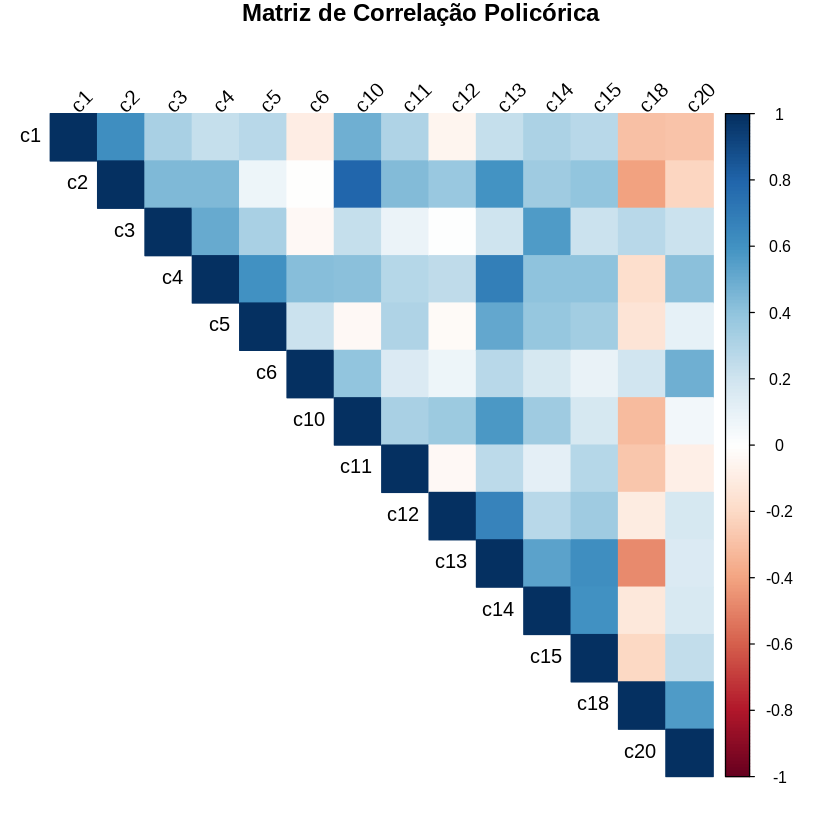

In [20]:
# Matriz de correlação policórica
corrplot(matriz_policorica_smooth$rho, method = "color", type = "upper",
         tl.col = "black", tl.srt = 45,
         title = "Matriz de Correlação Policórica",
         mar = c(0, 0, 1, 0))

In [21]:
#### Análise de validade convergente e discriminante

# Identificação de itens que pertencem à mesma heurística

# Criação de uma lista de heurísticas válidas (que têm itens no conjunto limpo)
heuristicas_validas <- list()
for (h in unique(dicionario$id_heuristica)) {
  itens_h <- dicionario$codigo_item[dicionario$id_heuristica == h]
  itens_validos_h <- intersect(itens_h, names(itens_limpos))
  if (length(itens_validos_h) > 0) {
    heuristicas_validas[[h]] <- itens_validos_h
  }
}

# Exibição das heurísticas válidas após filtragem
print("Heurísticas válidas após filtragem:")
print(heuristicas_validas)

[1] "Heurísticas válidas após filtragem:"
$h1
[1] "c1" "c2" "c3"

$h2
[1] "c4" "c5"

$h3
[1] "c6"  "c10"

$h4
[1] "c11"

$h5
[1] "c12" "c13" "c14" "c15"

$h6
[1] "c18"

$h7
[1] "c20"



In [25]:
# Cálculo da média das correlações dentro de cada heurística (validade convergente)
validade_convergente <- list()
for (nome in names(heuristicas_validas)) {
  itens <- heuristicas_validas[[nome]]
  if (length(itens) > 1) {  # Precisa de pelo menos 2 itens para calcular correlação
    correlacoes <- matriz_policorica$rho[itens, itens]
    # Remoção da diagonal (correlações de um item com ele mesmo)
    diag(correlacoes) <- NA
    media_correlacao <- mean(correlacoes, na.rm = TRUE)
    validade_convergente[[nome]] <- media_correlacao
  } else {
    validade_convergente[[nome]] <- NA  # Não é possível calcular com apenas 1 item
  }
}

# Cálculo da média das correlações entre itens de diferentes heurísticas (validade discriminante)
validade_discriminante <- matrix(NA, nrow = length(heuristicas_validas),
                               ncol = length(heuristicas_validas))
rownames(validade_discriminante) <- names(heuristicas_validas)
colnames(validade_discriminante) <- names(heuristicas_validas)

for (i in 1:length(heuristicas_validas)) {
  nome_i <- names(heuristicas_validas)[i]
  itens_i <- heuristicas_validas[[nome_i]]

  for (j in 1:length(heuristicas_validas)) {
    nome_j <- names(heuristicas_validas)[j]
    itens_j <- heuristicas_validas[[nome_j]]

    if (i != j && length(itens_i) > 0 && length(itens_j) > 0) {
      correlacoes <- matriz_policorica$rho[itens_i, itens_j]
      media_correlacao <- mean(correlacoes, na.rm = TRUE)
      validade_discriminante[i, j] <- media_correlacao
    }
  }
}

# Conversão para dataframe para facilitar a visualização
validade_convergente_df <- data.frame(
  Heuristica = names(validade_convergente),
  Media_Correlacao_Interna = unlist(validade_convergente),
  stringsAsFactors = FALSE
)

# Adição da descrição da heurística
validade_convergente_df$Descricao_Heuristica <- sapply(validade_convergente_df$Heuristica, function(h) {
  idx <- which(dicionario$id_heuristica == h)
  if (length(idx) > 0) dicionario$descricao_heuristica[idx[1]] else NA
})



In [26]:
# Salvamento dos resultados
write.csv(validade_convergente_df, "validade_convergente.csv", row.names = FALSE)
write.csv(validade_discriminante, "validade_discriminante.csv")


In [27]:
# Visualização dos resultados de validade convergente
print("Validade Convergente (média das correlações dentro de cada heurística):")
print(validade_convergente_df)

# Visualização dos resultados de validade discriminante
print("Validade Discriminante (média das correlações entre heurísticas diferentes):")
print(round(validade_discriminante, 2))

[1] "Validade Convergente (média das correlações dentro de cada heurística):"
   Heuristica Media_Correlacao_Interna
h1         h1                0.4612764
h2         h2                0.6008123
h3         h3                0.3909834
h4         h4                       NA
h5         h5                0.5086169
h6         h6                       NA
h7         h7                       NA
                                                        Descricao_Heuristica
h1                            Deixar as expectativas e limitações explícitas
h2                                                      Apoiar o uso efetivo
h3 Apoiar a compreensão do usuário sobre \nincerteza e a confiança do modelo
h4                                Assegurar privacidade e segurança de dados
h5                    Falhar graciosamente e suportar a recuperação de erros
h6                                Possibilitar coleta de feedback do usuário
h7                                                              Mitigar

In [30]:
# Cálculo da média das correlações com outras heurísticas para cada heurística
media_correlacoes_externas <- rowMeans(validade_discriminante, na.rm = TRUE)
validade_comparacao <- data.frame(
  Heuristica = names(heuristicas_validas),
  Descricao = sapply(names(heuristicas_validas), function(h) {
    idx <- which(dicionario$id_heuristica == h)
    if (length(idx) > 0) dicionario$descricao_heuristica[idx[1]] else NA
  }),
  Convergente = unlist(validade_convergente),
  Discriminante = media_correlacoes_externas,
  stringsAsFactors = FALSE
)

# Salvamento da comparação
write.csv(validade_comparacao, "validade_comparacao.csv", row.names = FALSE)

# Visualização da comparação
print("Comparação entre Validade Convergente e Discriminante:")
print(validade_comparacao)

[1] "Comparação entre Validade Convergente e Discriminante:"
   Heuristica
h1         h1
h2         h2
h3         h3
h4         h4
h5         h5
h6         h6
h7         h7
                                                                   Descricao
h1                            Deixar as expectativas e limitações explícitas
h2                                                      Apoiar o uso efetivo
h3 Apoiar a compreensão do usuário sobre \nincerteza e a confiança do modelo
h4                                Assegurar privacidade e segurança de dados
h5                    Falhar graciosamente e suportar a recuperação de erros
h6                                Possibilitar coleta de feedback do usuário
h7                                                              Mitigar viés
   Convergente Discriminante
h1   0.4612764    0.14497440
h2   0.6008123    0.22234566
h3   0.3909834    0.19827870
h4          NA    0.10185610
h5   0.5086169    0.17222231
h6          NA   -0.04919659
h7      

In [31]:
#### Análise Fatorial Exploratória (AFE) para verificar a estrutura latente dos itens

# Verificação da adequação dos dados para AFE
kmo_result <- KMO(matriz_policorica$rho)
print("Índice KMO (Kaiser-Meyer-Olkin):")
print(kmo_result$MSA)

[1] "Índice KMO (Kaiser-Meyer-Olkin):"
[1] 0.2063215


In [32]:
# Teste de Bartlett para esfericidade
bartlett_test <- cortest.bartlett(matriz_policorica$rho, n = nrow(itens_limpos))
print("Teste de Bartlett para esfericidade:")
print(bartlett_test)

[1] "Teste de Bartlett para esfericidade:"
$chisq
[1] 6303.501

$p.value
[1] 0

$df
[1] 91



Parallel analysis suggests that the number of factors =  5  and the number of components =  NA 


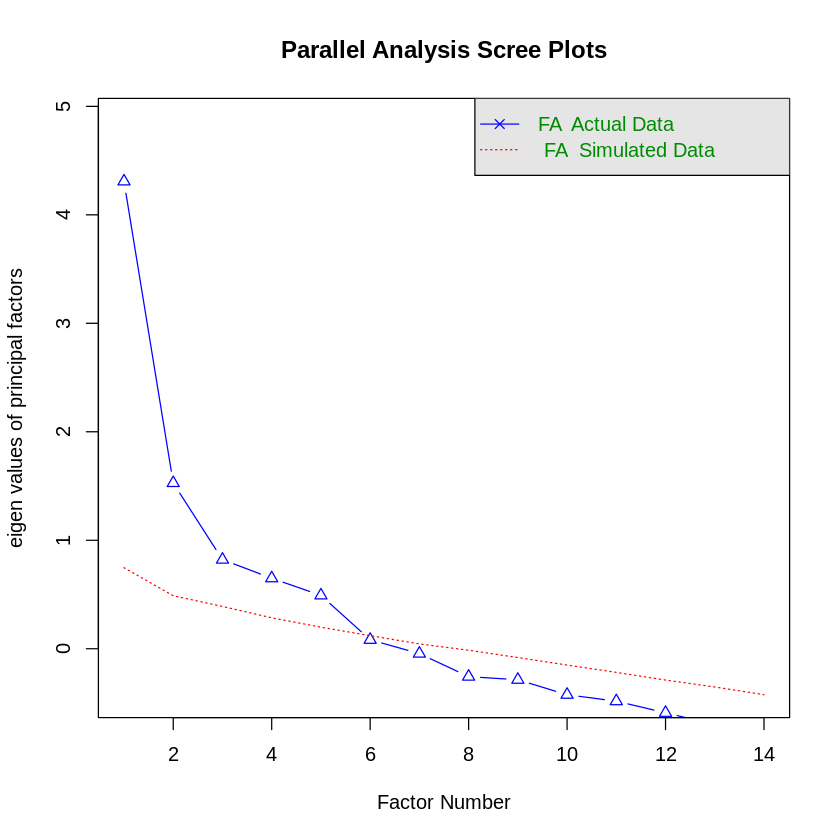

In [33]:
# Determinação do número ideal de fatores
scree_data <- fa.parallel(matriz_policorica$rho, n.obs = nrow(itens_limpos), fa = "fa")


In [35]:
# Número sugerido de fatores
n_fatores <- scree_data$nfact
print("Número sugerido de fatores:", n_fatores)

# Realização da análise fatorial exploratória
afe_resultado <- fa(matriz_policorica$rho, nfactors = n_fatores, rotate = "varimax", fm = "ml")
print(afe_resultado)

[1] "Número sugerido de fatores:"
Factor Analysis using method =  ml
Call: fa(r = matriz_policorica$rho, nfactors = n_fatores, rotate = "varimax", 
    fm = "ml")
Standardized loadings (pattern matrix) based upon correlation matrix
      ML1   ML2   ML3   ML5   ML4   h2     u2 com
c1  -0.08  0.71  0.20 -0.17  0.21 0.62 0.3763 1.5
c2   0.42  0.76  0.33 -0.12 -0.12 0.90 0.1016 2.1
c3   0.05  0.16  0.98  0.01  0.13 1.00 0.0050 1.1
c4   0.44  0.25  0.40  0.34  0.42 0.70 0.2963 4.5
c5   0.17  0.08  0.19  0.09  0.96 1.00 0.0050 1.2
c6   0.05  0.16 -0.10  0.80  0.14 0.70 0.2965 1.2
c10  0.34  0.84  0.11  0.35 -0.23 1.00 0.0050 1.9
c11  0.02  0.46 -0.02  0.01  0.28 0.29 0.7112 1.7
c12  0.82  0.01 -0.02  0.11 -0.18 0.71 0.2877 1.1
c13  0.86  0.35  0.06  0.16  0.33 1.00 0.0048 1.7
c14  0.40  0.21  0.49  0.11  0.21 0.50 0.5027 2.9
c15  0.62  0.02  0.16 -0.03  0.23 0.46 0.5410 1.4
c18 -0.41 -0.48  0.39  0.42 -0.16 0.75 0.2480 4.2
c20  0.17 -0.35  0.26  0.75 -0.01 0.78 0.2165 1.8

                 

In [36]:
# Salvamento dos resultados da AFE
sink("afe_resultados.txt")
print(afe_resultado)
sink()

In [38]:
# Cálculo da variância explicada por cada fator
var_explicada <- afe_resultado$Vaccounted
write.csv(var_explicada, "variancia_explicada.csv")

# Exibição da variância explicada
print("Variância explicada por fator:")
print(var_explicada)



[1] "Variância explicada por fator:"
                            ML1       ML2       ML3       ML5       ML4
SS loadings           2.6590518 2.6412623 1.7994306 1.7278215 1.5748217
Proportion Var        0.1899323 0.1886616 0.1285308 0.1234158 0.1124873
Cumulative Var        0.1899323 0.3785939 0.5071246 0.6305404 0.7430277
Proportion Explained  0.2556194 0.2539092 0.1729825 0.1660985 0.1513904
Cumulative Proportion 0.2556194 0.5095286 0.6825111 0.8486096 1.0000000


In [39]:
# Interpretação dos fatores
# Identificação dos itens com cargas significativas em cada fator
cargas_significativas <- afe_resultado$loadings > 0.3
itens_por_fator <- list()

for (i in 1:n_fatores) {
  itens_fator <- rownames(afe_resultado$loadings)[cargas_significativas[, i]]
  itens_por_fator[[paste0("Fator", i)]] <- itens_fator

  print(paste0("Itens com cargas significativas no Fator ", i, ":"))
  for (item in itens_fator) {
    idx <- which(dicionario$codigo_item == item)
    if (length(idx) > 0) {
      heuristica <- dicionario$id_heuristica[idx]
      descricao_h <- dicionario$descricao_heuristica[idx]
      print(paste0(item, " (", heuristica, " - ", descricao_h, ")"))
    } else {
      print(item)
    }
  }
  print("")
}

# Salvamento da estrutura de fatores
itens_por_fator_df <- data.frame(
  Fator = rep(names(itens_por_fator), sapply(itens_por_fator, length)),
  Item = unlist(itens_por_fator),
  stringsAsFactors = FALSE
)

itens_por_fator_df$Heuristica <- sapply(itens_por_fator_df$Item, function(item) {
  idx <- which(dicionario$codigo_item == item)
  if (length(idx) > 0) dicionario$id_heuristica[idx[1]] else NA
})

itens_por_fator_df$Descricao_Heuristica <- sapply(itens_por_fator_df$Item, function(item) {
  idx <- which(dicionario$codigo_item == item)
  if (length(idx) > 0) dicionario$descricao_heuristica[idx[1]] else NA
})

write.csv(itens_por_fator_df, "estrutura_fatores.csv", row.names = FALSE)


[1] "Itens com cargas significativas no Fator 1:"
[1] "c2 (h1 - Deixar as expectativas e limitações explícitas)"
[1] "c4 (h2 - Apoiar o uso efetivo)"
[1] "c10 (h3 - Apoiar a compreensão do usuário sobre \nincerteza e a confiança do modelo)"
[1] "c12 (h5 - Falhar graciosamente e suportar a recuperação de erros)"
[1] "c13 (h5 - Falhar graciosamente e suportar a recuperação de erros)"
[1] "c14 (h5 - Falhar graciosamente e suportar a recuperação de erros)"
[1] "c15 (h5 - Falhar graciosamente e suportar a recuperação de erros)"
[1] ""
[1] "Itens com cargas significativas no Fator 2:"
[1] "c1 (h1 - Deixar as expectativas e limitações explícitas)"
[1] "c2 (h1 - Deixar as expectativas e limitações explícitas)"
[1] "c10 (h3 - Apoiar a compreensão do usuário sobre \nincerteza e a confiança do modelo)"
[1] "c11 (h4 - Assegurar privacidade e segurança de dados)"
[1] "c13 (h5 - Falhar graciosamente e suportar a recuperação de erros)"
[1] ""
[1] "Itens com cargas significativas no Fator 3:"
[1] "c2 